In [2]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
from cartopy import crs as ccrs

In [ ]:
geopandas.GeoDataFrame

In [3]:
example_file = '/home/egor/PycharmProjects/deep_dr/logs/HyperSphericalVAE/run_5/latent.csv.gz'
latent_df = pd.read_csv(example_file)
print(latent_df.shape)
latent_df.head()

(234495, 3)


,VAE1,VAE2,VAE3
0,-0.021631,0.973298,0.228460
1,-0.216141,-0.559700,0.799992
2,0.853338,-0.094025,0.512799
3,0.935533,-0.223390,0.273613
4,-0.846529,-0.462942,-0.262744


In [4]:
latent_df.head()
from datasets import OrganoidDataset, CellType

data = OrganoidDataset(device='cpu')
X_val, y_val = data.val
metadata = pd.DataFrame(y_val.cpu()).rename({0: "Cell type", 1: "Day"}, axis=1)
metadata['Cell type'] = metadata['Cell type'].replace({i.value: i.name for i in CellType}).astype(str)
metadata.head()

,Cell type,Day
0,Enterocyte,2.0
1,Enterocyte,7.0
2,Tuft,5.0
3,Tuft,2.0
4,Stem,7.0


In [55]:
import cartopy
from shapely.geometry import Point

sphere = geopandas.GeoSeries(latent_df.apply(Point, axis=1),crs=cartopy.crs.Geocentric())
sphere.head()

/home/egor/PycharmProjects/deep_dr/venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


0      POINT Z (-0.02163 0.97330 0.22846)
1     POINT Z (-0.21614 -0.55970 0.79999)
2      POINT Z (0.85334 -0.09402 0.51280)
3      POINT Z (0.93553 -0.22339 0.27361)
4    POINT Z (-0.84653 -0.46294 -0.26274)
dtype: geometry

,Coordinates,Cell type,Day
0,POINT Z (-0.02163 0.97330 0.22846),Enterocyte,2.0
1,POINT Z (-0.21614 -0.55970 0.79999),Enterocyte,7.0
2,POINT Z (0.85334 -0.09402 0.51280),Tuft,5.0
3,POINT Z (0.93553 -0.22339 0.27361),Tuft,2.0
4,POINT Z (-0.84653 -0.46294 -0.26274),Stem,7.0


In [56]:
projected = sphere.to_crs(cartopy.crs.Mollweide())

In [59]:
projected.x

0         8.997532e+06
1        -8.091684e+06
2        -5.733496e+05
3        -1.314018e+06
4        -1.483513e+07
              ...     
234490   -4.029375e+06
234491    8.216898e+06
234492   -1.675166e+06
234493    1.198414e+07
234494    2.250548e+06
Length: 234495, dtype: float64

In [60]:
data = pd.DataFrame({'x':projected.x,'y':projected.y,'Cell type':metadata['Cell type'],'Day':metadata['Day']})
data.head()

,x,y,Cell type,Day
0,8.997532e+06,1.627381e+06,Enterocyte,2.0
1,-8.091684e+06,6.197260e+06,Enterocyte,7.0
2,-5.733496e+05,3.743259e+06,Tuft,5.0
3,-1.314018e+06,1.953762e+06,Tuft,2.0
4,-1.483513e+07,-1.874991e+06,Stem,7.0


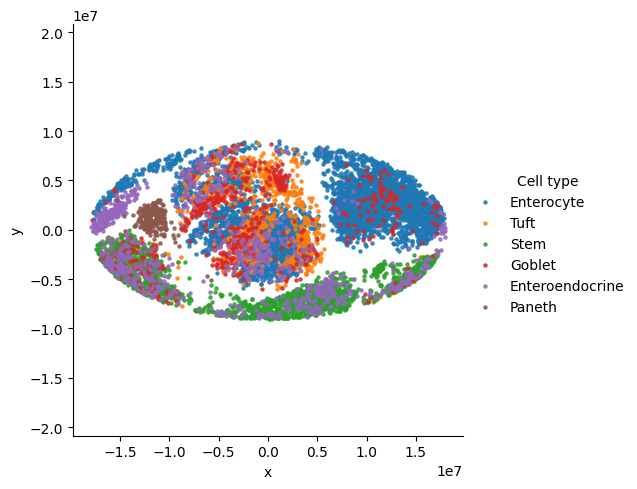

In [110]:
import seaborn as sns
sns.lmplot(x="x", y="y",
           data=data.head(10000),
           fit_reg=False,
           hue='Cell type',  # color by cluster
           legend=True,
           scatter_kws={"s": 5})
plt.axis('equal')
plt.savefig('sns_Mollweide.png')

In [109]:
import plotly.express as px
plot_data = pd.concat([latent_df, metadata], axis=1).head(5000)
fig = px.scatter_3d(plot_data, x='VAE1', y='VAE2', z='VAE3', color='Cell type')
fig.update_traces(marker_size = 3)
fig.write_html("plotly_3d.html")
fig.show()